## Học phần: Thị giác máy tính
#### Họ tên: Phạm Phước Bảo Tín
#### Mã sinh viên: 22E1020021

## Mô tả dữ liệu
- Bộ dữ liệu về phân loại "Shoe", "Sandal", "Boot". Nguồn dữ liệu : Kaggle ([Shoe vs Sandal vs Boot Image Dataset](https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images?fbclid=IwZXh0bgNhZW0CMTEAAR4Qhm5prfJKpfYH3kwbWi-Tcsk1Q1AHnBqh4scpOWhT4CTERDLwisuTuvNcDg_aem_8fGVUmMtZuHu_Cmj3jxaCg)).
- Ba lớp 3 thư mục riêng, mỗi thư mục 5000 ảnh.


## Chuẩn bị dữ liệu  + Theo dõi từng k, neen chọn bước nhảy là +2

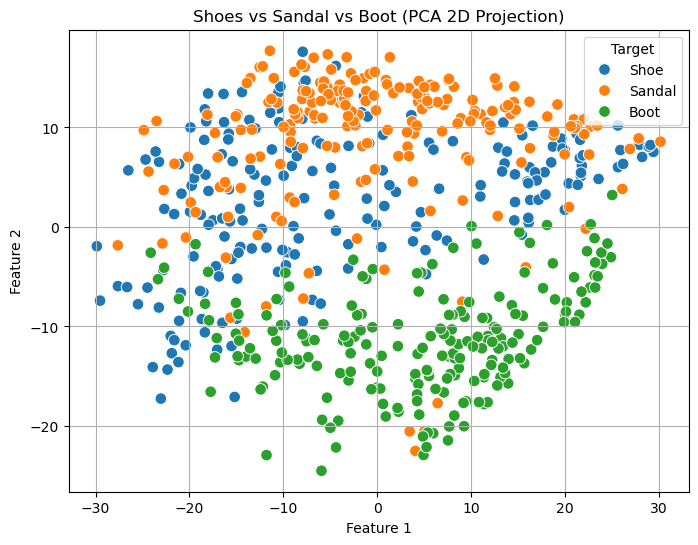

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import pandas as pd
# ======================
# 1. Chuẩn bị dữ liệu
# ======================
data_dir = r"D:\Shoe vs Sandal vs Boot Dataset"
classes = ["Shoe", "Sandal", "Boot"]

IMG_SIZE = 90  # resize ảnh kích thước 120x120

X = []
y = []

img_size = (64, 64)

for label, c in enumerate(classes):
    folder = os.path.join(data_dir, c)
    for img_file in os.listdir(folder)[:200]:  # lấy 50 ảnh cho nhẹ
        img = load_img(os.path.join(folder, img_file), target_size=img_size)
        arr = img_to_array(img).flatten() / 255.0
        X.append(arr)
        y.append(c)  # dùng tên class thay vì số cho dễ đọc

X = np.array(X)
#PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

df = pd.DataFrame(X_2d, columns=["Feature 1", "Feature 2"])
df["Target"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Feature 1", y="Feature 2",
    hue="Target", palette="tab10", legend="full", s=70
)
plt.title("Shoes vs Sandal vs Boot (PCA 2D Projection)")
plt.grid(True)
plt.show()


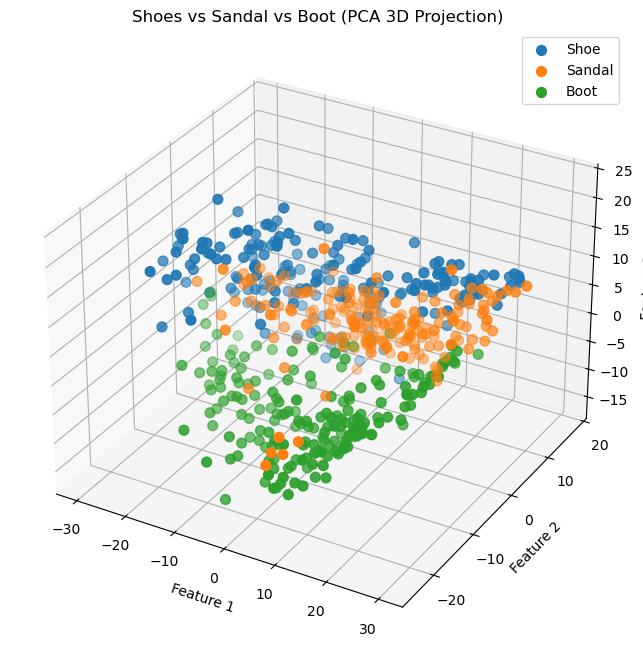

In [20]:
#PCA 3 chiều
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

df = pd.DataFrame(X_3d, columns=["Feature 1", "Feature 2", "Feature 3"])
df["Target"] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for target in df["Target"].unique():
    subset = df[df["Target"] == target]
    ax.scatter(subset["Feature 1"], subset["Feature 2"], subset["Feature 3"], label=target, s=50)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Shoes vs Sandal vs Boot (PCA 3D Projection)")
ax.legend()
plt.show()

In [10]:
X = []
y = []
for label, class_name in enumerate(classes):
    folder = os.path.join(data_dir, class_name)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)
# ======================
# 2. Tiền xử lý & chia dữ liệu
# ======================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

k=1, Accuracy=0.9043
k=3, Accuracy=0.9003
k=5, Accuracy=0.8933
k=7, Accuracy=0.8877
k=9, Accuracy=0.8827
k=11, Accuracy=0.8793
k=13, Accuracy=0.8757
k=15, Accuracy=0.8733


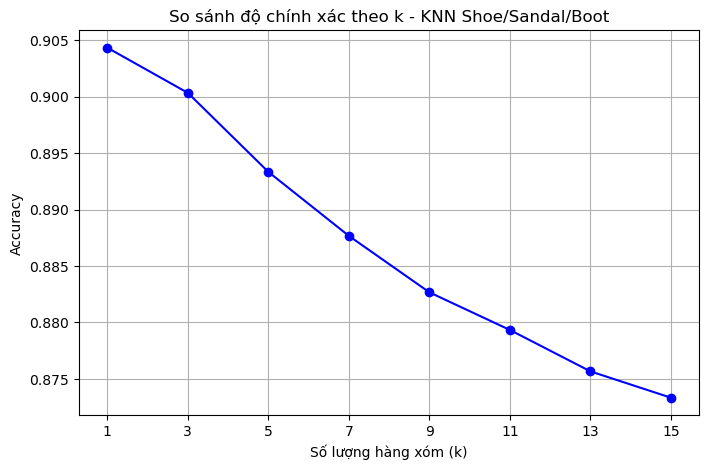

In [11]:


# 3. So sánh accuracy theo k
# ======================
k_values = range(1, 16, 2)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="b")
plt.xticks(k_values)
plt.xlabel("Số lượng hàng xóm (k)")
plt.ylabel("Accuracy")
plt.title("So sánh độ chính xác theo k - KNN Shoe/Sandal/Boot")
plt.grid(True)
plt.show()


Chọn k (từ kết quả thử nghiệm trên)

In [15]:
# ======================
# 3. Huấn luyện KNN
# ======================
k=3 
knn_k = KNeighborsClassifier(n_neighbors=k)
knn_k.fit(X_train, y_train)

# ======================
# 4. Đánh giá mô hình
# ======================
y_pred = knn_k.predict(X_test)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred, target_names=classes))



🔹 Accuracy: 0.9003333333333333

🔹 Classification Report:
               precision    recall  f1-score   support

        Shoe       0.88      0.93      0.90      1000
      Sandal       0.96      0.78      0.86      1000
        Boot       0.88      0.99      0.93      1000

    accuracy                           0.90      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.91      0.90      0.90      3000



Vẽ ma trận nhầm lẫn với K đã chọn

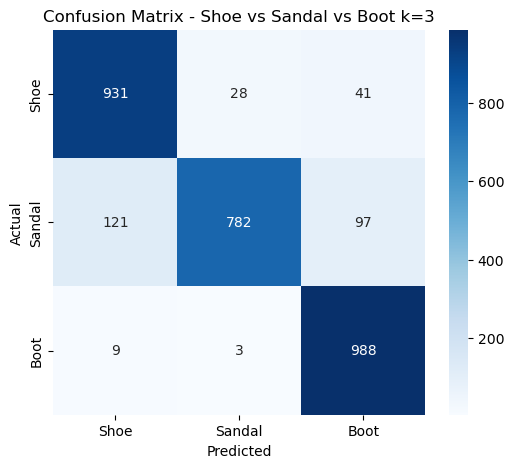

In [8]:
# 5. Ma trận nhầm lẫn
# ======================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Shoe vs Sandal vs Boot k={k}")
plt.show()


## Hàm phân loại từ ảnh tải ngẫu nhiên trên internet

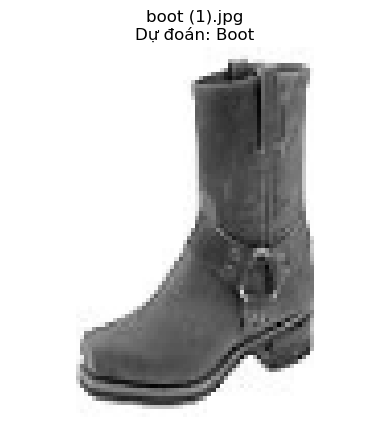

boot (1).jpg → Boot


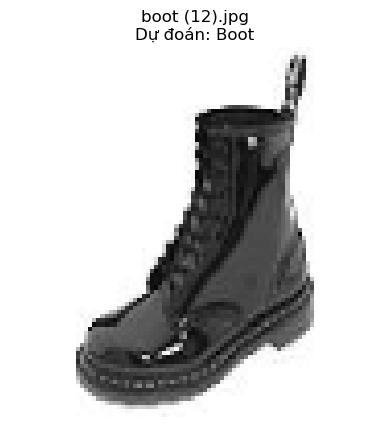

boot (12).jpg → Boot


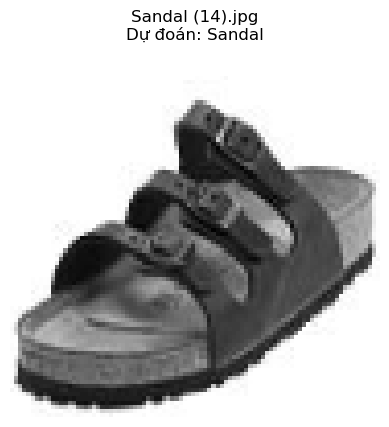

Sandal (14).jpg → Sandal


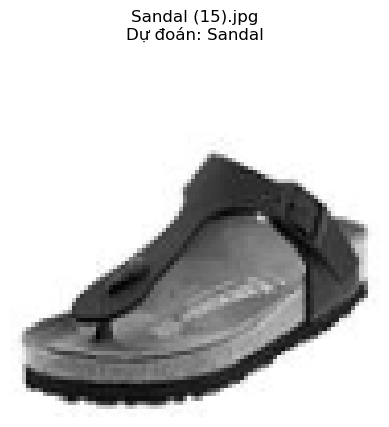

Sandal (15).jpg → Sandal


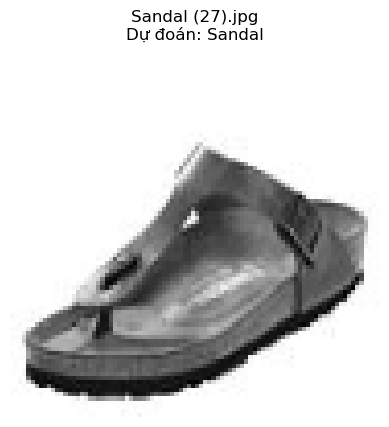

Sandal (27).jpg → Sandal


In [11]:
def predict_folder(folder_path, limit=10):
    results = []
    count = 0
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_flat = img.flatten().reshape(1, -1)
        img_scaled = scaler.transform(img_flat)
        prediction = knn_k.predict(img_scaled)[0]
        results.append((filename, classes[prediction]))

        # Hiển thị ảnh + nhãn dự đoán
        plt.imshow(img, cmap="gray")
        plt.title(f"{filename}\nDự đoán: {classes[prediction]}")
        plt.axis("off")
        plt.show()

        print(f"{filename} → {classes[prediction]}")

        count += 1
        if limit and count >= limit:  # giới hạn số ảnh hiển thị (mặc định 10)
            break
    
    return results

# Ví dụ: dự đoán toàn bộ ảnh trong thư mục test
test_dir = r"D:\Shoe vs Sandal vs Boot Dataset\test"
results = predict_folder(test_dir, limit=5)  # hiển thị thử 5 ảnh đầu


In [13]:
# ======================
# 6. Hàm dự đoán ảnh mới
# ======================
def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("❌ Không đọc được ảnh:", image_path)
        return
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_flat = img.flatten().reshape(1, -1)
    img_scaled = scaler.transform(img_flat)
    prediction = knn_k.predict(img_scaled)[0]
    
    # Hiển thị ảnh
    plt.imshow(img, cmap="gray")
    plt.title(f"Dự đoán: {classes[prediction]}")
    plt.axis("off")
    plt.show()

    print(f"Ảnh {image_path} được dự đoán là: {classes[prediction]}")
    

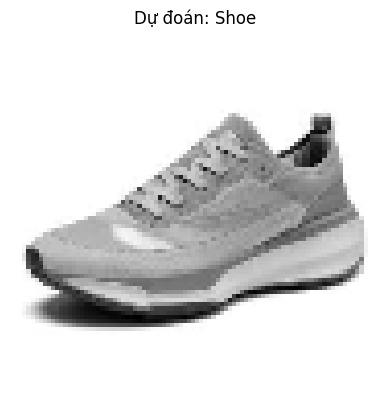

Ảnh D:\datasets\t11.jpg được dự đoán là: Shoe


In [53]:
# Ví dụ dự đoán 1 ảnh mới
predict_image(r"D:\datasets\t11.jpg")

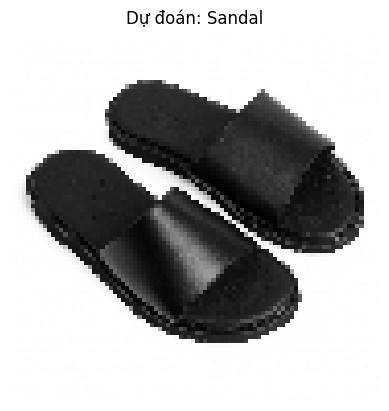

Ảnh D:\datasets\t1.jpg được dự đoán là: Sandal


In [41]:
# Ví dụ dự đoán 1 ảnh mới
predict_image(r"D:\datasets\t1.jpg")

In [14]:
# Ví dụ dự đoán 1 ảnh mới
predict_image(r"D:\Shoe vs Sandal vs Boot Dataset\551635737_1437925444100423_8057986009119178849_n (1).png")

NameError: name 'knn_k' is not defined

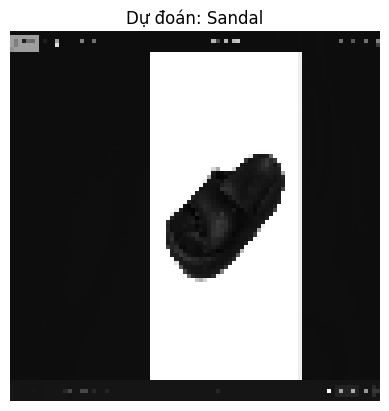

Ảnh D:\datasets\t13.png được dự đoán là: Sandal


In [43]:
# Ví dụ dự đoán 1 ảnh mới
predict_image(r"D:\datasets\t13.png")

In [12]:
predict_image(r"D:\Shoe vs Sandal vs Boot Dataset\551635737_1437925444100423_8057986009119178849_n (1).png")

NameError: name 'predict_image' is not defined

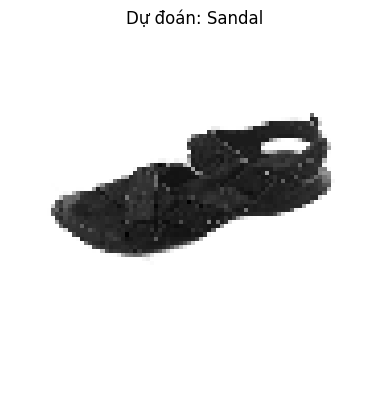

Ảnh D:\datasets\t20.png được dự đoán là: Sandal


In [65]:
predict_image(r"D:\datasets\t20.png")